## Credit Risk Model

### Import Library

In [886]:
import numpy as np
import pandas as pd

import os

In [887]:
# Check Directory saat ini
os.getcwd()

'c:\\Users\\USER\\Documents\\projects\\halotech\\credit risk model\\credit risk model'

In [888]:
# Check file apa saja yang ada di Directory saat ini
os.listdir()

['.git',
 'Credit Risk Model.ipynb',
 'lc_2016_2017.csv',
 'lc_loan.csv',
 'new.html',
 'README.md',
 'us-state-codes.csv']

In [889]:
# Membaca csv file dan melihat 5 baris pertama
loan_data = pd.read_csv('lc_2016_2017.csv')
loan_data.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_11304\4273129360.py:2: DtypeWarning: Columns (18,54) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data = pd.read_csv('lc_2016_2017.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,112435993,NaN,2300,2300,2300.0,36 months,12.62,77.08,C,C1,...,0.0,NaN,1.0,2.0,2315.0,55.0,7100.0,1.0,0.0,2.0
1,112290210,NaN,16000,16000,16000.0,60 months,12.62,360.95,C,C1,...,11078.0,69.0,3.0,5.0,1962.0,94.0,31900.0,0.0,6.0,1.0
2,112436985,NaN,6025,6025,6025.0,36 months,15.05,209.01,C,C4,...,0.0,NaN,1.0,2.0,1950.0,45.0,27700.0,1.0,5.0,3.0
3,112439006,NaN,20400,20400,20400.0,36 months,9.44,652.91,B,B1,...,53566.0,95.0,1.0,2.0,4240.0,60.0,46900.0,1.0,1.0,1.0
4,112438929,NaN,13000,13000,13000.0,36 months,11.99,431.73,B,B5,...,8466.0,72.0,0.0,1.0,2996.0,78.0,7800.0,0.0,0.0,0.0


In [890]:
# Melihat total baris dan kolom
loan_data.shape

(759338, 72)

In [891]:
# Melihat info seluruh kolom
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759338 entries, 0 to 759337
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           759338 non-null  int64  
 1   member_id                    0 non-null       float64
 2   loan_amnt                    759338 non-null  int64  
 3   funded_amnt                  759338 non-null  int64  
 4   funded_amnt_inv              759338 non-null  float64
 5   term                         759338 non-null  object 
 6   int_rate                     759338 non-null  float64
 7   installment                  759338 non-null  float64
 8   grade                        759338 non-null  object 
 9   sub_grade                    759338 non-null  object 
 10  emp_title                    708368 non-null  object 
 11  emp_length                   708975 non-null  object 
 12  home_ownership               759338 non-null  object 
 13 

### Target Variable
Dikarenakan project ini untuk mengetahui bad loan & good loan, maka perlu dibuat feature baru, yaitu target variable yang merepresentasikan bad loan (sebagai 1) dan good loan (sebagai 0).

In [892]:
# Melihat unique values pada feature loan_status
loan_data.loan_status.unique()

array(['Current', 'Fully Paid', 'In Grace Period', 'Late (31-120 days)',
       'Late (16-30 days)', 'Charged Off', 'Default'], dtype=object)

In [893]:
# Membuat feature baru yaitu good_bad sebagai target variable,
# Jika loan_statusnya 'Charged Off', 'Default', 'Late (31-120 days)', 'Late (16-30 days)' 
# akan dianggap sebagai bad_loan atau 1 dan nilai selain itu akan dianggap good loan atau 0
loan_data['good_bad'] = np.where(loan_data.loc[:, 'loan_status'].isin(['Charged Off', 
                                                                   'Default', 'Late (31-120 days)', 'Late (16-30 days)'])
                                , 1 , 0)

In [894]:
# Melihat distribusi 0 dan 1
loan_data.good_bad.value_counts()

good_bad
0    702875
1     56463
Name: count, dtype: int64

In [895]:
loan_data[['loan_status', 'good_bad']]

,loan_status,good_bad
0,Current,0
1,Current,0
2,Current,0
3,Current,0
4,Current,0
...,...,...
759333,Current,0
759334,Current,0
759335,Late (16-30 days),1
759336,Current,0


In [896]:
loan_data.good_bad.value_counts(normalize=True)

good_bad
0    0.925642
1    0.074358
Name: proportion, dtype: float64

### Missing Value
Feature yang memiliki missing values lebih dari 50% akan di drop, karena jika ingin diisi dengan nilai lain seperti median atau mean, maka errornya akan sangat tinggi. Lebih baik di drop agar tidak membuat model semakin tidak akurat.

In [897]:
# Melihat feature apa saja yang memiliki missing value lebih dari 50%
missing_values = pd.DataFrame(loan_data.isnull().sum()/loan_data.shape[0])
missing_values = missing_values[missing_values.iloc[:,0] > 0.50]
missing_values.sort_values([0], ascending=False)

,0
member_id,1.000000
desc,0.999978
dti_joint,0.955223
annual_inc_joint,0.955220
verification_status_joint,0.955220
mths_since_last_record,0.814076
mths_since_last_major_derog,0.716720


In [898]:
# Drop feature tersebut
loan_data.dropna(thresh = loan_data.shape[0]*0.5, axis = 1, inplace = True)

In [899]:
# Pengecheckan ulang apakah feature tersebut berhasil di drop
missing_values = pd.DataFrame(loan_data.isnull().sum()/loan_data.shape[0])
missing_values = missing_values[missing_values.iloc[:,0] > 0.50]
missing_values.sort_values([0], ascending = False)

,0


In [900]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759338 entries, 0 to 759337
Data columns (total 66 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          759338 non-null  int64  
 1   loan_amnt                   759338 non-null  int64  
 2   funded_amnt                 759338 non-null  int64  
 3   funded_amnt_inv             759338 non-null  float64
 4   term                        759338 non-null  object 
 5   int_rate                    759338 non-null  float64
 6   installment                 759338 non-null  float64
 7   grade                       759338 non-null  object 
 8   sub_grade                   759338 non-null  object 
 9   emp_title                   708368 non-null  object 
 10  emp_length                  708975 non-null  object 
 11  home_ownership              759338 non-null  object 
 12  annual_inc                  759338 non-null  float64
 13  verification_s

### Data Splitting

In [901]:
loan_data.shape

(759338, 66)

In [902]:
from sklearn.model_selection import train_test_split

In [903]:
# Membagi data menjadi 80% train set dan 20% test set
X = loan_data.drop('good_bad', axis = 1)
y = loan_data['good_bad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state= 42)

In [904]:
X_train.shape, X_test.shape

((607470, 65), (151868, 65))

In [949]:
X_train.head()

,term,emp_length,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_last_credit_pull_d
147577,36,4,358,88,78.0,78.0
505776,36,10,273,98,83.0,79.0
412425,36,0,301,83,78.0,78.0
618730,36,5,228,92,78.0,78.0
111143,36,6,149,87,78.0,78.0


In [905]:
y_train.shape, y_test.shape

((607470,), (151868,))

In [906]:
y_train.value_counts(normalize = True)

good_bad
0    0.925642
1    0.074358
Name: proportion, dtype: float64

In [907]:
y_test.value_counts(normalize = True)

good_bad
0    0.925639
1    0.074361
Name: proportion, dtype: float64

### Data Cleaning

In [908]:
# Terdapat 65 kolom, bagaimana untuk mengetahui kolom apa saja yang memiliki data kotor?
X_train.shape

(607470, 65)

In [909]:
# Dapat dilakukan print untuk semua unique values kolom, sehingga dapat di cek satu-satu
# unique values apa saja yang kotor.

# for col in X_train.select_dtypes(include= ['object','bool']).columns:
#     print(col)
#     print(X_train[col].unique())
#     print()

In [910]:
# Kolom/feature yang harus di cleaning
col_need_to_clean = ['term', 'emp_length', 'issue_d', 'earliest_cr_line', 'last_pymnt_d', 
                    'next_pymnt_d', 'last_credit_pull_d']

In [911]:
X_train['term'].unique()

array(['36 months', '60 months'], dtype=object)

In [912]:
# Menghilangkan ' months' menjadi ''
X_train['term'].str.replace(' months', '')

147577    36
505776    36
412425    36
618730    36
111143    36
          ..
150426    36
195135    36
182511    36
82596     36
165904    36
Name: term, Length: 607470, dtype: object

In [913]:
# Convert data type menjadi numeric 
X_train['term'] = pd.to_numeric(X_train['term'].str.replace(' months', ''))

In [914]:
X_train['term']

147577    36
505776    36
412425    36
618730    36
111143    36
          ..
150426    36
195135    36
182511    36
82596     36
165904    36
Name: term, Length: 607470, dtype: int64

In [915]:
# Cek values apa saja yang harus di cleaning
X_train['emp_length'].unique()

array(['4 years', '10+ years', '< 1 year', '5 years', '6 years',
       '7 years', '2 years', '3 years', '8 years', '1 year', nan,
       '9 years'], dtype=object)

In [916]:
X_train['emp_length'] = X_train['emp_length'].str.replace(' years', '')
X_train['emp_length'] = X_train['emp_length'].str.replace('+', '')
X_train['emp_length'] = X_train['emp_length'].str.replace('< 1 year', str(0))
X_train['emp_length'] = X_train['emp_length'].str.replace(' year', '')

X_train['emp_length'] = X_train['emp_length'].fillna(0)

In [917]:
X_train['emp_length'].unique()

array(['4', '10', '0', '5', '6', '7', '2', '3', '8', '1', 0, '9'],
      dtype=object)

In [918]:

X_train['emp_length'] = pd.to_numeric(X_train['emp_length'])

In [919]:
X_train['emp_length'].unique()

array([ 4, 10,  0,  5,  6,  7,  2,  3,  8,  1,  9], dtype=int64)

In [920]:
X_train['emp_length']

147577     4
505776    10
412425     0
618730     5
111143     6
          ..
150426     8
195135     0
182511    10
82596      3
165904     1
Name: emp_length, Length: 607470, dtype: int64

In [921]:
col_date = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']
X_train[col_date]

,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
147577,Feb-2017,Aug-1994,Dec-2017,Jan-2018,Dec-2017
505776,Apr-2016,Sep-2001,Jul-2017,NaN,Nov-2017
412425,Jul-2017,May-1999,Dec-2017,Jan-2018,Dec-2017
618730,Oct-2016,Jun-2005,Dec-2017,Jan-2018,Dec-2017
111143,Mar-2017,Jan-2012,Dec-2017,Jan-2018,Dec-2017
...,...,...,...,...,...
150426,Feb-2017,Nov-1998,Nov-2017,NaN,Dec-2017
195135,Jan-2017,Sep-1993,Dec-2017,Jan-2018,Dec-2017
182511,Jan-2017,Mar-1988,Dec-2017,Jan-2018,Dec-2017
82596,Apr-2017,Jan-2003,Dec-2017,Jan-2018,Dec-2017


In [922]:
for col in col_date:
    X_train[col] = pd.to_datetime(X_train[col])

C:\Users\USER\AppData\Local\Temp\ipykernel_11304\2317582935.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X_train[col] = pd.to_datetime(X_train[col])
C:\Users\USER\AppData\Local\Temp\ipykernel_11304\2317582935.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X_train[col] = pd.to_datetime(X_train[col])
C:\Users\USER\AppData\Local\Temp\ipykernel_11304\2317582935.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X_train[col] = pd.to_datetime(X_train[col])
C:\Users\USER\AppData\Local\Temp\ipykernel_11304\2317582935.py:2: UserWarning: Could not infer format, so each e

In [923]:
X_train[col_date]

,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
147577,2017-02-01,1994-08-01,2017-12-01,2018-01-01,2017-12-01
505776,2016-04-01,2001-09-01,2017-07-01,NaT,2017-11-01
412425,2017-07-01,1999-05-01,2017-12-01,2018-01-01,2017-12-01
618730,2016-10-01,2005-06-01,2017-12-01,2018-01-01,2017-12-01
111143,2017-03-01,2012-01-01,2017-12-01,2018-01-01,2017-12-01
...,...,...,...,...,...
150426,2017-02-01,1998-11-01,2017-11-01,NaT,2017-12-01
195135,2017-01-01,1993-09-01,2017-12-01,2018-01-01,2017-12-01
182511,2017-01-01,1988-03-01,2017-12-01,2018-01-01,2017-12-01
82596,2017-04-01,2003-01-01,2017-12-01,2018-01-01,2017-12-01


In [924]:
# Dapat dilakukan print untuk semua unique values kolom, sehingga dapat di cek satu-satu
# unique values apa saja yang kotor.

# for col in X_test.select_dtypes(include= ['object', 'bool']).columns:
#   print(col)
#   print(X_test[col].unique())
#   print()

In [925]:
X_test['term'] = pd.to_numeric(X_test['term'].str.replace('months', ''))

X_test['emp_length'] = X_test['emp_length'].str.replace(' years', '')
X_test['emp_length'] = X_test['emp_length'].str.replace('+', '')
X_test['emp_length'] = X_test['emp_length'].str.replace('< 1 year', str(0))
X_test['emp_length'] = X_test['emp_length'].str.replace(' year', '')

X_test['emp_length'] = X_test['emp_length'].fillna(0)
X_test['emp_length'] = pd.to_numeric(X_test['emp_length'])

In [926]:
for col in col_date:
    X_test[col] = pd.to_datetime(X_test[col])

C:\Users\USER\AppData\Local\Temp\ipykernel_11304\2991849270.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X_test[col] = pd.to_datetime(X_test[col])
C:\Users\USER\AppData\Local\Temp\ipykernel_11304\2991849270.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X_test[col] = pd.to_datetime(X_test[col])
C:\Users\USER\AppData\Local\Temp\ipykernel_11304\2991849270.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X_test[col] = pd.to_datetime(X_test[col])
C:\Users\USER\AppData\Local\Temp\ipykernel_11304\2991849270.py:2: UserWarning: Could not infer format, so each element

In [927]:
X_train[col_need_to_clean].info()

<class 'pandas.core.frame.DataFrame'>
Index: 607470 entries, 147577 to 165904
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   term                607470 non-null  int64         
 1   emp_length          607470 non-null  int64         
 2   issue_d             607470 non-null  datetime64[ns]
 3   earliest_cr_line    607470 non-null  datetime64[ns]
 4   last_pymnt_d        606735 non-null  datetime64[ns]
 5   next_pymnt_d        473147 non-null  datetime64[ns]
 6   last_credit_pull_d  607453 non-null  datetime64[ns]
dtypes: datetime64[ns](5), int64(2)
memory usage: 37.1 MB


In [928]:
X_test[col_need_to_clean].info()

<class 'pandas.core.frame.DataFrame'>
Index: 151868 entries, 280647 to 267584
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   term                151868 non-null  int64         
 1   emp_length          151868 non-null  int64         
 2   issue_d             151868 non-null  datetime64[ns]
 3   earliest_cr_line    151868 non-null  datetime64[ns]
 4   last_pymnt_d        151655 non-null  datetime64[ns]
 5   next_pymnt_d        118276 non-null  datetime64[ns]
 6   last_credit_pull_d  151867 non-null  datetime64[ns]
dtypes: datetime64[ns](5), int64(2)
memory usage: 9.3 MB


### Feature Engineering

In [929]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((607470, 65), (607470,), (151868, 65), (151868,))

In [930]:
# Kolom yang akan di feature engineering
col_need_to_clean

['term',
 'emp_length',
 'issue_d',
 'earliest_cr_line',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d']

In [931]:
X_train = X_train[col_need_to_clean]
X_test = X_test[col_need_to_clean]

In [932]:
# tidak dibutuhkan untuk feature engineering
del X_train['next_pymnt_d']
del X_test['next_pymnt_d']

In [933]:
X_train.shape, X_test.shape

((607470, 6), (151868, 6))

In [934]:
from datetime import date
date.today().strftime('%Y-%m-%d')

'2024-06-14'

In [935]:
from dateutil.relativedelta import relativedelta

In [936]:
def date_columns(df, column):
    today_date = pd.to_datetime(date.today().strftime('%Y-%m-%d'))
    
    # Menambahkan debug print untuk memeriksa nilai awal
    print(f"Nilai awal kolom {column}:")
    print(df[column].head())
    
    try:
        df[column] = pd.to_datetime(df[column], format='%b-%y')
    except Exception as e:
        print(f"Error converting column {column}: {e}")
        print(df[column].head())
        return

    def calculate_months_since(date):
        if pd.isnull(date):
            return None
        delta = relativedelta(today_date, date)
        return delta.years * 12 + delta.months

    try:
        df['mths_since_' + column] = df[column].apply(calculate_months_since)
    except Exception as e:
        print(f"Error applying calculate_months_since on column {column}: {e}")
        print(df[column].head())
        return

    df.drop(columns=[column], inplace=True)

# apply to X_train
date_columns(X_train, 'earliest_cr_line')
date_columns(X_train, 'issue_d')
date_columns(X_train, 'last_pymnt_d')
date_columns(X_train, 'last_credit_pull_d')


Nilai awal kolom earliest_cr_line:
147577   1994-08-01
505776   2001-09-01
412425   1999-05-01
618730   2005-06-01
111143   2012-01-01
Name: earliest_cr_line, dtype: datetime64[ns]
Nilai awal kolom issue_d:
147577   2017-02-01
505776   2016-04-01
412425   2017-07-01
618730   2016-10-01
111143   2017-03-01
Name: issue_d, dtype: datetime64[ns]
Nilai awal kolom last_pymnt_d:
147577   2017-12-01
505776   2017-07-01
412425   2017-12-01
618730   2017-12-01
111143   2017-12-01
Name: last_pymnt_d, dtype: datetime64[ns]
Nilai awal kolom last_credit_pull_d:
147577   2017-12-01
505776   2017-11-01
412425   2017-12-01
618730   2017-12-01
111143   2017-12-01
Name: last_credit_pull_d, dtype: datetime64[ns]


In [937]:
pd.to_datetime(date.today().strftime('%Y-%m-%d')) - pd.to_datetime('2017-04-01')

Timedelta('2631 days 00:00:00')

In [938]:
X_train

,term,emp_length,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_last_credit_pull_d
147577,36,4,358,88,78.0,78.0
505776,36,10,273,98,83.0,79.0
412425,36,0,301,83,78.0,78.0
618730,36,5,228,92,78.0,78.0
111143,36,6,149,87,78.0,78.0
...,...,...,...,...,...,...
150426,36,8,307,88,79.0,78.0
195135,36,0,369,89,78.0,78.0
182511,36,10,435,89,78.0,78.0
82596,36,3,257,86,78.0,78.0


In [939]:
# apply to X_test
date_columns(X_test, 'earliest_cr_line')
date_columns(X_test, 'issue_d')
date_columns(X_test, 'last_pymnt_d')
date_columns(X_test, 'last_credit_pull_d')

Nilai awal kolom earliest_cr_line:
280647   1999-11-01
419992   2006-01-01
44633    1976-12-01
245940   2005-12-01
565744   1970-10-01
Name: earliest_cr_line, dtype: datetime64[ns]
Nilai awal kolom issue_d:
280647   2016-07-01
419992   2017-07-01
44633    2017-05-01
245940   2016-08-01
565744   2016-11-01
Name: issue_d, dtype: datetime64[ns]
Nilai awal kolom last_pymnt_d:
280647   2017-05-01
419992   2017-12-01
44633    2017-11-01
245940   2017-11-01
565744   2017-12-01
Name: last_pymnt_d, dtype: datetime64[ns]
Nilai awal kolom last_credit_pull_d:
280647   2017-12-01
419992   2017-12-01
44633    2017-05-01
245940   2017-12-01
565744   2017-12-01
Name: last_credit_pull_d, dtype: datetime64[ns]


In [940]:
X_test

,term,emp_length,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_last_credit_pull_d
280647,60,10,295,95,85.0,78.0
419992,36,7,221,83,78.0,78.0
44633,36,0,570,85,79.0,85.0
245940,36,2,222,94,79.0,78.0
565744,36,0,644,91,78.0,78.0
...,...,...,...,...,...,...
70748,36,4,147,85,78.0,78.0
43047,60,4,263,85,78.0,78.0
99030,36,0,250,86,78.0,87.0
625689,36,1,142,99,78.0,78.0


In [941]:
X_test.isnull().sum()

term                               0
emp_length                         0
mths_since_earliest_cr_line        0
mths_since_issue_d                 0
mths_since_last_pymnt_d          213
mths_since_last_credit_pull_d      1
dtype: int64

In [942]:
X_train.isnull().sum()

term                               0
emp_length                         0
mths_since_earliest_cr_line        0
mths_since_issue_d                 0
mths_since_last_pymnt_d          735
mths_since_last_credit_pull_d     17
dtype: int64

In [943]:
X_train.fillna(X_train.median(), inplace = True)
X_test.fillna(X_test.median(), inplace = True)

### Modelling

In [944]:
from sklearn.linear_model import LogisticRegression

In [945]:
model = LogisticRegression()

In [946]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [947]:
y_test

280647    1
419992    0
44633     0
245940    0
565744    0
         ..
70748     0
43047     0
99030     0
625689    0
267584    0
Name: good_bad, Length: 151868, dtype: int32

In [948]:
result = pd.DataFrame(list(zip(y_pred,y_test)), columns = ['y_pred', 'y_test'])
result.head()

,y_pred,y_test
0,0,1
1,0,0
2,0,0
3,0,0
4,0,0


In [951]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.9173163536755603

In [952]:
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

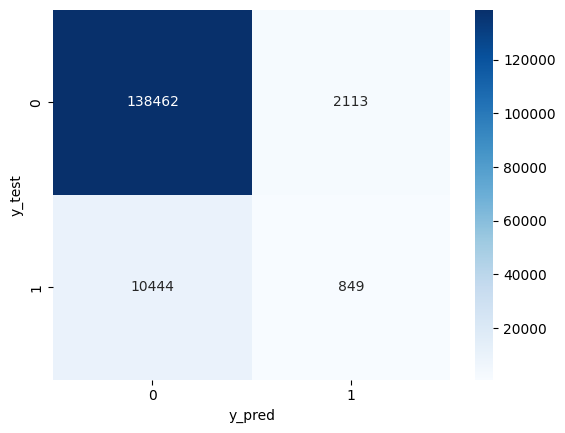

In [958]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='.0f', cmap=plt.cm.Blues)
plt.xlabel('y_pred')
plt.ylabel('y_test')

plt.show()

In [956]:
y_train.value_counts(normalize=True)

good_bad
0    0.925642
1    0.074358
Name: proportion, dtype: float64